
 == Premier League 22/23 Team Stats Comparator ==

| TEAMS                                                 |
| ========================= | ========================= |
| Arsenal                   | Aston Villa               |
| Bournemouth               | Brentford                 |
| Brighton and Hove Albion  | Chelsea                   |
| Crystal Palace            | Everton                   |
| Fulham                    | Leeds United              |
| Leicester City            | Liverpool                 |
| Manchester City           | Manchester United         |
| Newcastle United          | Nottingham Forest         |
| Southampton               | Tottenham Hotspur         |
| West Ham United           | Wolverhampton Wanderers   |
| ========================= | ========================= |

1. Compare Two Teams
2. Compare All Teams
3. Exit

Enter your choice (1-3): 2

PARAMETERS AVAILABLE                                            
==================== | ==================== | ===

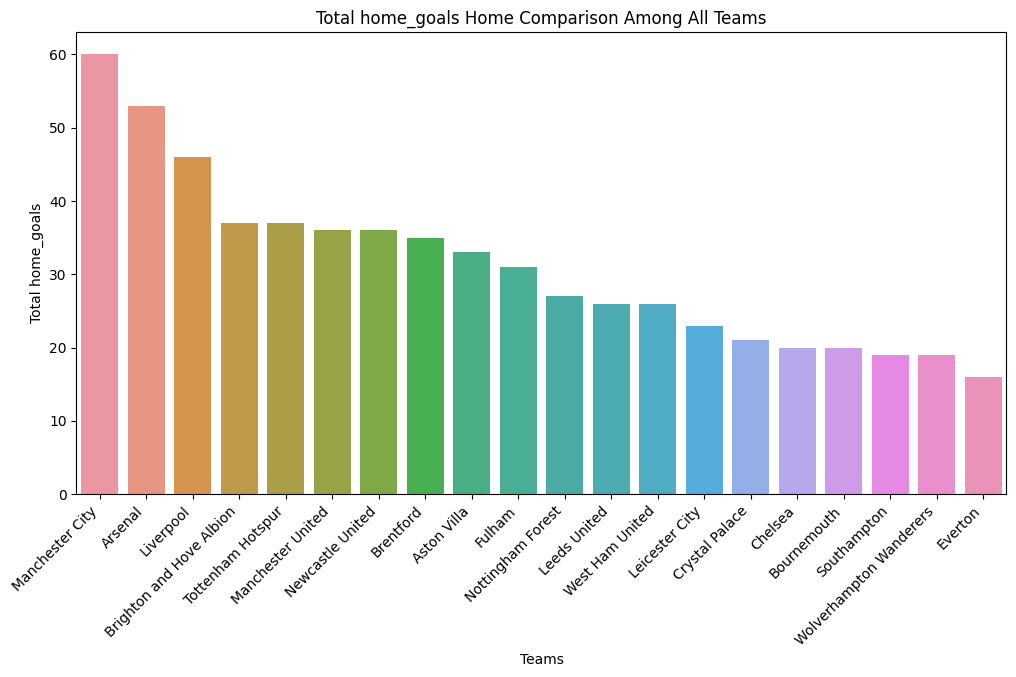


The team with the highest total home_goals is Manchester City with a total of 60.

The team with the highest per match home_goals is Manchester City with a total of 1.58.

 == Premier League 22/23 Team Stats Comparator ==

| TEAMS                                                 |
| ========================= | ========================= |
| Arsenal                   | Aston Villa               |
| Bournemouth               | Brentford                 |
| Brighton and Hove Albion  | Chelsea                   |
| Crystal Palace            | Everton                   |
| Fulham                    | Leeds United              |
| Leicester City            | Liverpool                 |
| Manchester City           | Manchester United         |
| Newcastle United          | Nottingham Forest         |
| Southampton               | Tottenham Hotspur         |
| West Ham United           | Wolverhampton Wanderers   |
| ========================= | ========================= |

1. Compare Two Teams


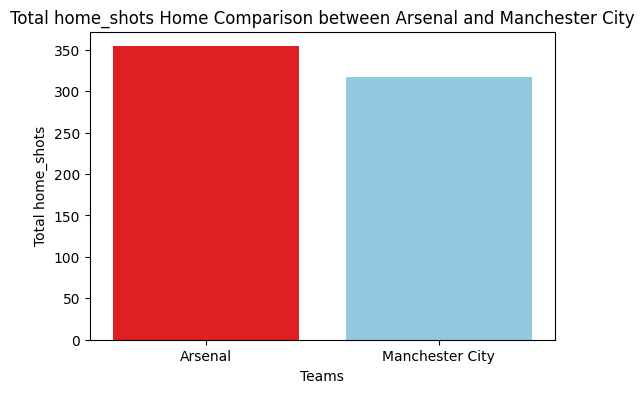


| TOTAL STATS                            |
| ========================= | ========== |
| TEAM                      | home_shots |
| ========================= | ========== |
| Arsenal                   | 354.00     |
| Manchester City           | 317.00     |
| DIFFERENCE                | 37.00      |
| ========================= | ========== |


| PER MATCH AVERAGE                      |
| ========================= | ========== |
| TEAM                      | home_shots |
| ========================= | ========== |
| Arsenal                   | 9.32       |
| Manchester City           | 8.34       |
| DIFFERENCE                | 0.97       |
| ========================= | ========== |

Arsenal had a greater home_shots stat than Manchester City

 == Premier League 22/23 Team Stats Comparator ==

| TEAMS                                                 |
| ========================= | ========================= |
| Arsenal                   | Aston Villa               |
| Bournemouth          

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def read_csv(file_path):
    return pd.read_csv(file_path)

def compare_teams_parameter(data_frame, team1_name, team2_name, parameter, match_type, team_colors):
    if match_type.lower() == 'home':
        team1_parameter = data_frame[data_frame['Home Team'] == team1_name][parameter].sum()
        team2_parameter = data_frame[data_frame['Home Team'] == team2_name][parameter].sum()
    elif match_type.lower() == 'away':
        team1_parameter = data_frame[data_frame['Away Team'] == team1_name][parameter].sum()
        team2_parameter = data_frame[data_frame['Away Team'] == team2_name][parameter].sum()
    else:
        raise ValueError("Invalid match_type. Please use 'home' or 'away'.")

    fig, ax = plt.subplots(figsize=(6, 4))
    team_colors = [team_colors[team1_name], team_colors[team2_name]]
    sns.barplot(x=[team1_name, team2_name], y=[team1_parameter, team2_parameter], palette=team_colors)

    ax.set_title(f'Total {parameter} {match_type.capitalize()} Comparison between {team1_name} and {team2_name}')
    ax.set_xlabel('Teams')
    ax.set_ylabel(f'Total {parameter}')

    plt.show()

    print("\n| {:<25}   {:10} |".format("TOTAL STATS", ""))
    print("| {:<25} | {:10} |".format("=========================", "=========="))
    print("| {:<25} | {:10} |".format("TEAM", parameter))
    print("| {:<25} | {:10} |".format("=========================", "=========="))
    print("| {:<25} | {:10} |".format(team1_name, format(team1_parameter, ".2f")))
    print("| {:<25} | {:10} |".format(team2_name, format(team2_parameter, ".2f")))
    print("| {:<25} | {:10} |".format("DIFFERENCE", format(abs(team1_parameter - team2_parameter), ".2f")))
    print("| {:<25} | {:10} |".format("=========================", "=========="))

    print("\n\n| {:<25}   {:10} |".format("PER MATCH AVERAGE", ""))
    print("| {:<25} | {:10} |".format("=========================", "=========="))
    print("| {:<25} | {:10} |".format("TEAM", parameter))
    print("| {:<25} | {:10} |".format("=========================", "=========="))
    print("| {:<25} | {:10} |".format(team1_name, format(team1_parameter/38, ".2f")))
    print("| {:<25} | {:10} |".format(team2_name, format(team2_parameter/38, ".2f")))
    print("| {:<25} | {:10} |".format("DIFFERENCE", format(abs((team1_parameter/38) - (team2_parameter/38)), ".2f")))
    print("| {:<25} | {:10} |\n".format("=========================", "=========="))

    if(team1_parameter>team2_parameter):
      print(team1_name,"had a greater",parameter,"stat than",team2_name)
    elif(team1_parameter<team2_parameter):
      print(team2_name,"had a greater",parameter,"stat than",team1_name)
    else:
      print(team1_name,"and",team2_name,"had equal",parameter)

def compare_all_teams(data_frame, parameter, match_type):
    teams = data_frame['Home Team'].unique()
    total_parameters = []

    for team_name in teams:
        if match_type.lower() == 'home':
            team_parameter = data_frame[data_frame['Home Team'] == team_name][parameter].sum()
        elif match_type.lower() == 'away':
            team_parameter = data_frame[data_frame['Away Team'] == team_name][parameter].sum()
        else:
            raise ValueError("Invalid match_type. Please use 'home' or 'away'.")

        total_parameters.append((team_name, team_parameter))

    total_parameters.sort(key=lambda x: x[1], reverse=True)

    top_team_name, top_team_parameter = total_parameters[0]

    fig, ax = plt.subplots(figsize=(12, 6))
    sns.barplot(x=[team[0] for team in total_parameters], y=[team[1] for team in total_parameters])

    ax.set_title(f'Total {parameter} {match_type.capitalize()} Comparison Among All Teams')
    ax.set_xlabel('Teams')
    ax.set_ylabel(f'Total {parameter}')

    plt.xticks(rotation=45, ha='right')
    plt.show()

    print(f"\nThe team with the highest total {parameter} is {top_team_name} with a total of {top_team_parameter}.")
    top_team_parameter_1 = format(top_team_parameter/38, ".2f")
    print(f"\nThe team with the highest per match {parameter} is {top_team_name} with a total of {top_team_parameter_1}.")

def main():
    file_path = 'Premier_League.csv'
    data_frame = read_csv(file_path)

    team_colors = {
      "Arsenal": "red",
      "Aston Villa": "purple",
      "Bournemouth": "brown1",
      "Brentford": "yellow",
      "Brighton and Hove Albion": "cyan",
      "Chelsea": "royalblue",
      "Crystal Palace": "cadetblue2",
      "Everton": "navy",
      "Fulham": "pink",
      "Leeds United": "gray85",
      "Leicester City": "darkblue",
      "Liverpool": "firebrick",
      "Manchester City": "skyblue",
      "Manchester United": "darkred",
      "Newcastle United": "black",
      "Nottingham Forest": "indianred1",
      "Southampton": "thistle",
      "Tottenham Hotspur": "purple",
      "West Ham United": "maroon",
      "Wolverhampton Wanderers": "gold"
    }

    while True:
        print("\n == Premier League 22/23 Team Stats Comparator ==\n")
        print("| {:<25}   {:<25} |".format("TEAMS", ""))
        print("| {:<25} | {:<25} |".format("=========================", "========================="))
        print("| {:<25} | {:<25} |".format("Arsenal", "Aston Villa"))
        print("| {:<25} | {:<25} |".format("Bournemouth", "Brentford"))
        print("| {:<25} | {:<25} |".format("Brighton and Hove Albion", "Chelsea"))
        print("| {:<25} | {:<25} |".format("Crystal Palace", "Everton"))
        print("| {:<25} | {:<25} |".format("Fulham", "Leeds United"))
        print("| {:<25} | {:<25} |".format("Leicester City", "Liverpool"))
        print("| {:<25} | {:<25} |".format("Manchester City", "Manchester United"))
        print("| {:<25} | {:<25} |".format("Newcastle United", "Nottingham Forest"))
        print("| {:<25} | {:<25} |".format("Southampton", "Tottenham Hotspur"))
        print("| {:<25} | {:<25} |".format("West Ham United", "Wolverhampton Wanderers"))
        print("| {:<25} | {:<25} |".format("=========================", "========================="))
        print("\n1. Compare Two Teams")
        print("2. Compare All Teams")
        print("3. Exit")

        choice = input("\nEnter your choice (1-3): ")

        if choice == '1':
            print("\n{:<20}  {:<20}  {:<20}".format("PARAMETERS AVAILABLE", "", ""))
            print("{:<20} | {:<20} | {:<20}".format("====================", "====================", "===================="))
            print("{:<20} | {:<20} | {:<20}".format("->", "home_goals", "away_goals"))
            print("{:<20} | {:<20} | {:<20}".format("home_red", "away_red", "home_possessions"))
            print("{:<20} | {:<20} | {:<20}".format("away_possessions", "home_shots", "away_shots"))
            print("{:<20} | {:<20} | {:<20}".format("home_on", "away_on", "home_off"))
            print("{:<20} | {:<20} | {:<20}".format("away_off", "home_blocked", "away_blocked"))
            print("{:<20} | {:<20} | {:<20}".format("home_pass", "away_pass", "home_chances"))
            print("{:<20} | {:<20} | {:<20}".format("away_chances", "home_corners", "away_corners"))
            print("{:<20} | {:<20} | {:<20}".format("home_offside", "away_offside", "home_tackles"))
            print("{:<20} | {:<20} | {:<20}".format("away_tackles", "home_duels", "away_duels"))
            print("{:<20} | {:<20} | {:<20}".format("home_saves", "away_saves", "home_fouls"))
            print("{:<20} | {:<20} | {:<20}".format("away_fouls", "home_yellow", "away_yellow"))
            team1_name = input("\nEnter the first team name: ")
            team2_name = input("Enter the second team name: ")
            parameter_to_compare = input("Enter the parameter to compare: ")

            try:
              if 'home' in parameter_to_compare.lower():
                  match_type = 'home'
              elif 'away' in parameter_to_compare.lower():
                  match_type = 'away'
              else:
                  raise ValueError("Invalid parameter. Please include 'home' or 'away' in the parameter name.")

              print("\nGRAPH\n")
              compare_teams_parameter(data_frame, team1_name, team2_name, parameter_to_compare, match_type, team_colors)

            except KeyError:
              print(f"Invalid parameter: {parameter_to_compare}. Please enter a valid parameter.")
            except ValueError as e:
              print(f"Error: {e}")

        elif choice == '2':
            print("\n{:<20}  {:<20}  {:<20}".format("PARAMETERS AVAILABLE", "", ""))
            print("{:<20} | {:<20} | {:<20}".format("====================", "====================", "===================="))
            print("{:<20} | {:<20} | {:<20}".format("->", "home_goals", "away_goals"))
            print("{:<20} | {:<20} | {:<20}".format("home_red", "away_red", "home_possessions"))
            print("{:<20} | {:<20} | {:<20}".format("away_possessions", "home_shots", "away_shots"))
            print("{:<20} | {:<20} | {:<20}".format("home_on", "away_on", "home_off"))
            print("{:<20} | {:<20} | {:<20}".format("away_off", "home_blocked", "away_blocked"))
            print("{:<20} | {:<20} | {:<20}".format("home_pass", "away_pass", "home_chances"))
            print("{:<20} | {:<20} | {:<20}".format("away_chances", "home_corners", "away_corners"))
            print("{:<20} | {:<20} | {:<20}".format("home_offside", "away_offside", "home_tackles"))
            print("{:<20} | {:<20} | {:<20}".format("away_tackles", "home_duels", "away_duels"))
            print("{:<20} | {:<20} | {:<20}".format("home_saves", "away_saves", "home_fouls"))
            print("{:<20} | {:<20} | {:<20}".format("away_fouls", "home_yellow", "away_yellow"))
            parameter_to_compare = input("\nEnter the parameter to compare: ")

            try:
              if 'home' in parameter_to_compare.lower():
                  match_type = 'home'
              elif 'away' in parameter_to_compare.lower():
                  match_type = 'away'
              else:
                  raise ValueError("Invalid parameter. Please include 'home' or 'away' in the parameter name.")

              print("\nGRAPH\n")
              compare_all_teams(data_frame, parameter_to_compare, match_type)

            except KeyError:
              print(f"Invalid parameter: {parameter_to_compare}. Please enter a valid parameter.")
            except ValueError as e:
              print(f"Error: {e}")

        elif choice == '3':
            print("Exiting the program. Goodbye!")
            break
        else:
            print("Invalid choice. Please enter a valid number[1-3].")

if __name__ == "__main__":
    main()